In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

The heart dataset contains many predictor variables but we'll limit ourselves to maximum heartrate to keep our example simple.

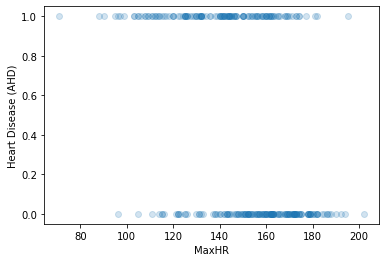

In [2]:
heart_data = pd.read_csv('data/Heart.csv', index_col=0)
x = heart_data.MaxHR.values
y = heart_data.AHD.replace(('Yes', 'No'), (1,0)).values # encode response as 1 or 0
plt.scatter(x, y, alpha=0.2)
plt.xlabel('MaxHR')
plt.ylabel('Heart Disease (AHD)');

Now it's your turn to construct the components of our percpetron.

In [3]:
### edTest(test_affine) ###
def affine(x, w, b):
    """Return affine transformation of x
    
    INPUTS
    ======
    x: A numpy array of points in x
    w: A float representing the weight of the perceptron
    b: A float representing the bias of the perceptron
    
    RETURN
    ======
    z: A numpy array of points after the affine transformation
    """
    
    # your code here
    z = b + w * x
    return z

In [4]:
### edTest(test_sigmoid) ###
def sigmoid(z):
    # hint: numpy has an exponentiation function, np.exp()
    # your code here
    h = 1 / (1 + np.exp(-z))
    return h

In [5]:
### edTest(test_neuron_predict) ###
def neuron_predict(x, w, b):
    # your code here
    h = sigmoid(affine(x,w,b))
    return h

Here we will manually set the weight and bais parameters. 

Recall from lecture that the weight changes the slope of the sigmoid and the bias shifts the function to the left or right.

In [6]:
w = -0.70 # hint: try values between -1 and 1
b = 99  # hint: try values between 50 and 100

Now we will use the perceptron to make predictions and plot our results.

In [7]:
# The forward mode or predict of a single neuron
x_linspace = np.linspace(x.min(),x.max(),500) # create evenly spaced values of x to predict on
h = neuron_predict(x_linspace,w, b)

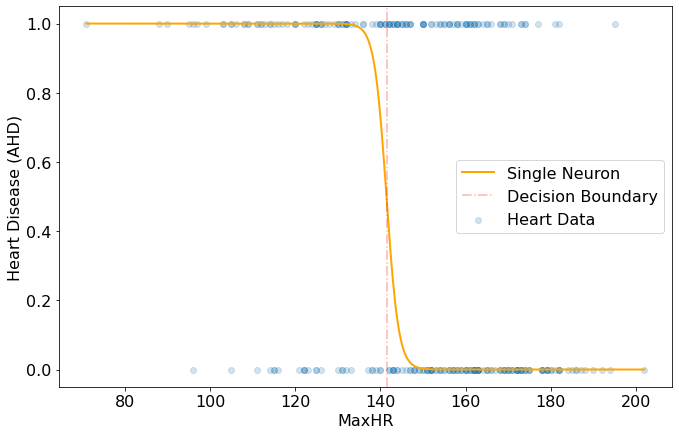

In [8]:
# Plot Predictions
fig, ax = plt.subplots(1,1, figsize=(11,7))
ax.scatter(x, y, label=r'Heart Data', alpha=0.2)
ax.plot(x_linspace, h, lw=2, c='orange', label=r'Single Neuron')
db = x_linspace[np.argmax(h<0.5)] # first value in x_linspace with a probability < 0.5
ax.axvline(x=db, alpha=0.3, linestyle='-.', c='r', label='Decision Boundary')

# Proper plot labels are very important!
ax.tick_params(labelsize=16) # Make the tick labels big enough to read
plt.xlabel('MaxHR', fontsize=16)
plt.ylabel('Heart Disease (AHD)', fontsize=16);
ax.legend(fontsize=16, loc='best') # Create a legend and make it big enough to read
plt.show()

One way to assess our perceptron model's performance is to look at the binary cross entropy loss.

In [9]:
def loss(y_true, y_pred, eps=1e-15):
    assert y_true.shape[0] == y_pred.shape[0]
    return -sum(y_true*np.log(y_pred) + (1-y_true)*(np.log(1-y_pred)))

In [10]:
## print the loss
h = neuron_predict(x, w, b)
print(loss(y, h))

nan


<ipython-input-9-cd23197f2d48>:3: RuntimeWarning: divide by zero encountered in log
  return -sum(y_true*np.log(y_pred) + (1-y_true)*(np.log(1-y_pred)))
<ipython-input-9-cd23197f2d48>:3: RuntimeWarning: invalid value encountered in multiply
  return -sum(y_true*np.log(y_pred) + (1-y_true)*(np.log(1-y_pred)))


To ensure our perceptron model is not trivial we need to compare its accuracy to a baseline which always predicts the majority class (i.e., no heart disease). Play with your weights above and rerun the notebook until you can outperform the baseline.

In [11]:
def accuracy(y_true, y_pred):
    assert y_true.shape[0] == y_pred.shape[0]
    return sum(y_true == (y_pred >= 0.5).astype(int))/len(y_true)

In [12]:
### edTest(test_performance) ###
baseline_acc = accuracy(y, np.zeros(len(y))) # predictions are all zeros
perceptron_acc = accuracy(y, h)
print(f'Baseline Accuracy: {baseline_acc:.2%}')
print(f'Perceptron Accuracy: {perceptron_acc:.2%}')

Baseline Accuracy: 54.13%
Perceptron Accuracy: 67.99%
